In [138]:
import time

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import pandas as pd

import cv2

In [140]:
df_drive_log = pd.read_csv('./data/driving_log.csv')
print(df_drive_log.shape)

(8036, 7)


In [152]:
df_drive_log.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [153]:
from sklearn.model_selection import train_test_split 
df_drive_log_train, df_drive_log_test = train_test_split(df_drive_log, test_size=0.2, random_state=0)

In [155]:
df_drive_log_train.head()

,center,left,right,steering,throttle,brake,speed
6244,IMG/center_2016_12_01_13_43_40_097.jpg,IMG/left_2016_12_01_13_43_40_097.jpg,IMG/right_2016_12_01_13_43_40_097.jpg,0.000000,0.985533,0.0,30.18663
3658,IMG/center_2016_12_01_13_38_48_989.jpg,IMG/left_2016_12_01_13_38_48_989.jpg,IMG/right_2016_12_01_13_38_48_989.jpg,0.071328,0.000000,0.0,10.09866
4411,IMG/center_2016_12_01_13_40_05_403.jpg,IMG/left_2016_12_01_13_40_05_403.jpg,IMG/right_2016_12_01_13_40_05_403.jpg,0.000000,0.000000,0.0,23.47174
4157,IMG/center_2016_12_01_13_39_39_587.jpg,IMG/left_2016_12_01_13_39_39_587.jpg,IMG/right_2016_12_01_13_39_39_587.jpg,-0.078746,0.889496,0.0,30.15932
1783,IMG/center_2016_12_01_13_35_39_009.jpg,IMG/left_2016_12_01_13_35_39_009.jpg,IMG/right_2016_12_01_13_35_39_009.jpg,0.000000,0.985533,0.0,30.18695


In [191]:
import sklearn

data_dir = './data/'

def generator(df_drive_log, batch_size=128):
    nb_samples = df_drive_log.shape[0]
    while True:
        sklearn.utils.shuffle(df_drive_log)

        for offset in range(0, nb_samples, batch_size):
            df_drive_log_batches = df_drive_log[offset:offset + batch_size]

            images = []
            steerings = []

            for index, row in df_drive_log_batches.iterrows():
                correction = 0.2
                # center image
                img_file_center = data_dir + row['center'].strip()
                img_center = cv2.imread(img_file_center)
                img_center = cv2.cvtColor(img_center, cv2.COLOR_BGR2RGB)
                # left image
                img_file_left = data_dir + row['left'].strip()
                img_left = cv2.imread(img_file_left)
                img_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB)
                # right image
                img_file_right = data_dir + row['right'].strip()
                img_right = cv2.imread(img_file_right)
                img_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB)
                # steering
                steering_center = row['steering']
                steering_left = steering_center + correction
                steering_right = steering_center - correction

                images.extend([img_center, img_left, img_right])
                steerings.extend([steering_center, steering_left, steering_right])

            X = np.array(images)
            y = np.array(steerings)

            yield sklearn.utils.shuffle(X, y)

In [192]:
test_generator = generator(df_drive_log)

In [193]:
X, y = next(test_generator)

In [194]:
X.shape

(384, 160, 320, 3)

In [195]:
y.shape

(384,)

In [181]:
for index, row in df_drive_log.iterrows():
    correction = 0.2
    # center image
    img_file_center = data_dir + row['center']
    img_center = cv2.imread(img_file_center)
    #img_center = cv2.cvtColor(img_center, cv2.COLOR_BGR2RGB)
    # left image
    img_file_left = data_dir + row['left']
    img_left = cv2.imread(img_file_left)
    #img_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB)
    # right image
    img_file_right = data_dir + row['right']
    img_right = cv2.imread(img_file_right)
    #img_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB)
    # steering
    steering_center = row['steering']
    steering_left = steering_center + correction
    steering_right = steering_center - correction
    break

./data/IMG/left_2016_12_01_13_30_48_287.jpg


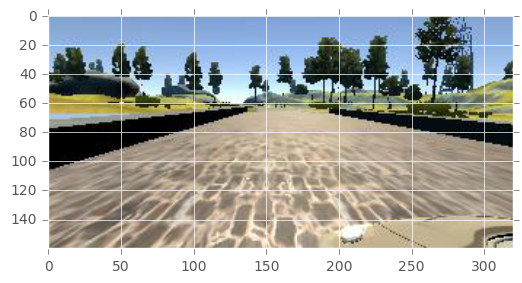

In [190]:
# left image
img_file_left = data_dir + row['left'].strip()
img_left = cv2.imread(img_file_left)
img_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB)

print(img_file_left)
plt.imshow(img_left)
plt.show()

In [179]:
X, y = next(test_generator)

error: /Users/jenkins/miniconda/1/x64/conda-bld/work/opencv-3.1.0/modules/imgproc/src/color.cpp:7341: error: (-215) scn == 3 || scn == 4 in function ipp_cvtColor


In [142]:
df_drive_log['steering'].describe()

count    8036.000000
mean        0.004070
std         0.128840
min        -0.942695
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: steering, dtype: float64

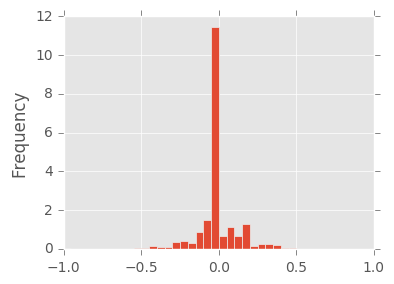

In [143]:
# Histogram of steering

figsize = (4, 3)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
bins = np.arange(-1, 1, 0.05)
df_drive_log['steering'].plot(kind='hist', bins=bins, normed=True, ax=ax)
plt.show()

## Images

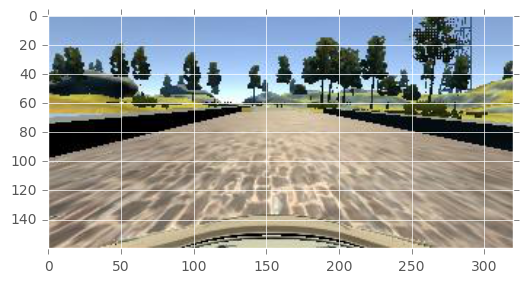

In [144]:
# check a sample of the images
img_dir = './data/IMG/'
img_1 = 'center_2016_12_01_13_30_48_287.jpg'

img_1 = cv2.imread(img_dir + img_1)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)
plt.show()

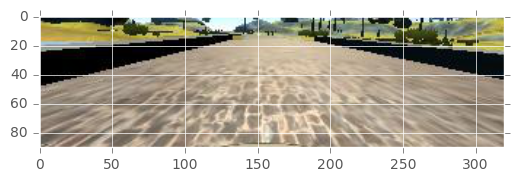

In [145]:
# crop a image
img_dir = './data/IMG/'
img_1 = 'center_2016_12_01_13_30_48_287.jpg'

img_1 = cv2.imread(img_dir + img_1)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_1 = img_1[50:-20]

plt.imshow(img_1)
plt.show()

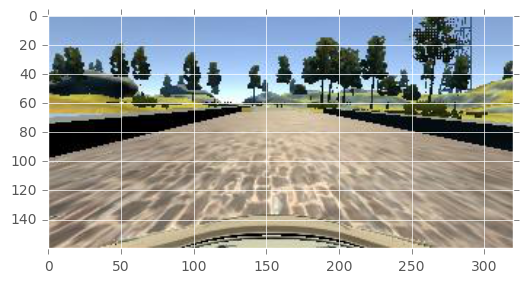

In [146]:
img_file = './data/' + df_drive_log['center'].values[0]
img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

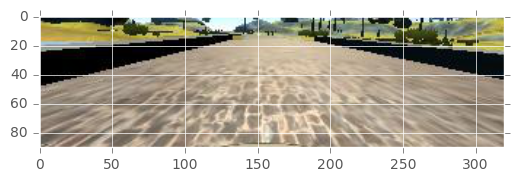

In [147]:
plt.imshow(img_1)

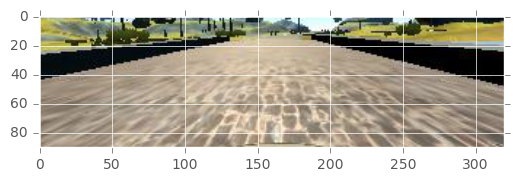

In [150]:
img_1_flipped = cv2.flip(img_1, 1)
plt.imshow(img_1_flipped)
plt.show()

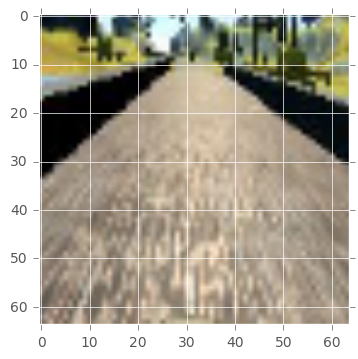

In [151]:
img_1_resized = cv2.resize(img_1, (64, 64))
plt.imshow(img_1_resized)

In [1]:
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Activation
from keras.layers import Convolution2D
from keras.layers import Cropping2D
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
from keras.layers import Input
from keras.layers import Lambda
from keras.layers import MaxPooling2D
from keras.layers import merge

Using TensorFlow backend.


In [122]:
input_shape = (160, 320, 3)

input_img = Input(shape=input_shape)

In [123]:
cropping2d = Cropping2D(cropping=((50, 20), (0, 0)))#, input_shape=input_shape, dim_ordering='tf')

In [124]:
img_cropped = cropping2d(input_img)

In [125]:
cropping2d.input_shape

(None, 160, 320, 3)

In [126]:
cropping2d.output_shape

(None, 90, 320, 3)

In [127]:
lmbd = Lambda(lambda x: x / 127.5 - 1)

In [128]:
img_normalized = lmbd(img_cropped)

In [129]:
lmbd.input_shape

(None, 90, 320, 3)

In [130]:
lmbd.output_shape

(None, 90, 320, 3)

In [131]:
conv = \
Convolution2D(
    96, 7, 7,
    init='glorot_uniform',
    activation='relu',
    border_mode='same',
    subsample=(2, 2),
    dim_ordering='tf',
    name='conv1')

In [132]:
conv1 = conv(img_normalized)

In [133]:
conv.input_shape

(None, 90, 320, 3)

In [134]:
conv.output_shape

(None, 45, 160, 96)

In [135]:
maxpool = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='maxpool1', dim_ordering='tf')

In [136]:
maxpool1 = maxpool(conv1)

ValueError: Negative dimension size caused by subtracting 3 from 0 for 'MaxPool_14' (op: 'MaxPool') with input shapes: [?,45,0,96].